## Polinomial Regression


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
pwd

'C:\\Users\\Tetiana'

In [3]:
cd C:\Users\Tetiana\Documents\GitHub\Datasets\FuelConsumption

C:\Users\Tetiana\Documents\GitHub\Datasets\FuelConsumption


In [4]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 602E-BB1D

 Directory of C:\Users\Tetiana\Documents\GitHub\Datasets\FuelConsumption

16.05.2021  18:04    <DIR>          .
16.05.2021  18:04    <DIR>          ..
16.05.2021  18:04    <DIR>          .ipynb_checkpoints
16.05.2021  18:04            72ÿ629 FuelConsumption.csv
16.05.2021  18:04            35ÿ920 FuelConsumptionEDA.ipynb
               2 File(s)        108ÿ549 bytes
               3 Dir(s)  270ÿ363ÿ766ÿ784 bytes free


In [5]:
df = pd.read_csv("FuelConsumption.csv")
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [6]:
df.iloc[0]

MODELYEAR                      2014
MAKE                          ACURA
MODEL                           ILX
VEHICLECLASS                COMPACT
ENGINESIZE                        2
CYLINDERS                         4
TRANSMISSION                    AS5
FUELTYPE                          Z
FUELCONSUMPTION_CITY            9.9
FUELCONSUMPTION_HWY             6.7
FUELCONSUMPTION_COMB            8.5
FUELCONSUMPTION_COMB_MPG         33
CO2EMISSIONS                    196
Name: 0, dtype: object

## Lets select some features that we want to use for regression.

In [12]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


### Lets plot Emission values with respect to Engine size:


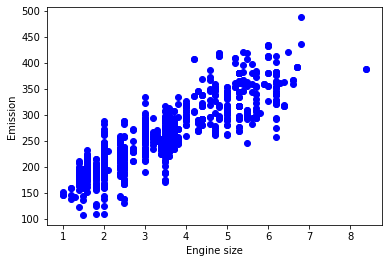

In [13]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

# Use Train test split:

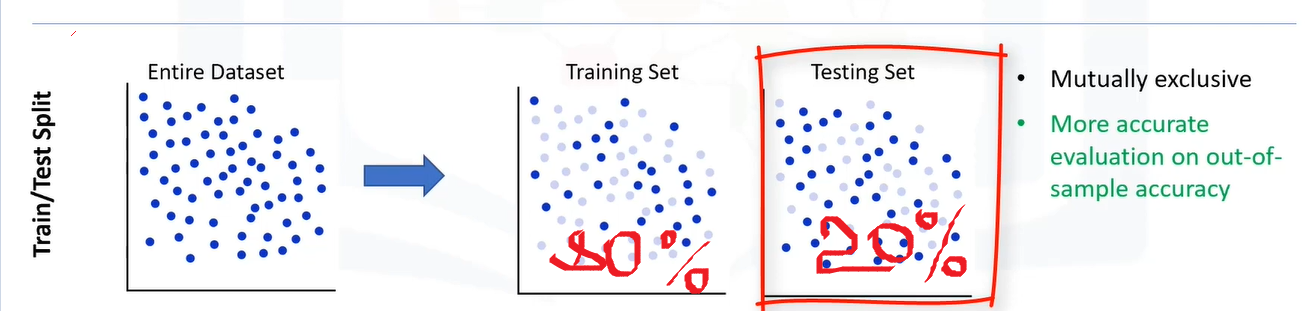

In [9]:
msk = np.random.rand(len(df)) < 0.8
msk

array([ True,  True, False, ...,  True,  True,  True])

In [10]:
train = cdf[msk]
test = cdf[~msk]

len(train),len(test)

(879, 188)

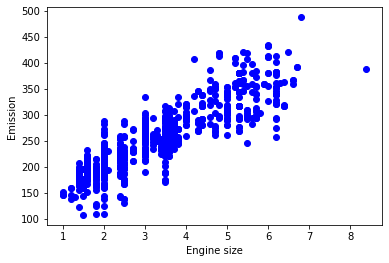

In [11]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

# Polinominal Regression


Sometimes, the trend of data is not really linear, and looks curvy. In this case we can use Polynomial regression methods. In fact, many different regressions exist that can be used to fit whatever the dataset looks like, such as quadratic, cubic, and so on, and it can go on and on to infinite degrees.

In essence, we can call all of these, polynomial regression, where the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial in x. Lets say you want to have a polynomial regression (let's make 2 degree polynomial):

$$y = b + \theta_1  x + \theta_2 x^2$$

Now, the question is: how we can fit our data on this equation while we have only x values, such as **Engine Size**? 
Well, we can create a few additional features: 1, $x$, and $x^2$.

**PolynomialFeatures()** function in Scikit-learn library, drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, lets say the original feature set has only one feature, _ENGINESIZE_. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2: 


In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [18]:
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

In [19]:
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

In [20]:
poly = PolynomialFeatures(degree=2)
poly

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [21]:
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

It looks like feature sets for multiple linear regression analysis, right? Yes. It Does. 
Indeed, Polynomial regression is a special case of linear regression, with the main idea of how do you select your features. Just consider replacing the  $x$ with $x_1$, $x_1^2$ with $x_2$, and so on. Then the degree 2 equation would be turn into:

$$y = b + \theta_1  x_1 + \theta_2 x_2$$

Now, we can deal with it as 'linear regression' problem. Therefore, this polynomial regression is considered to be a special case of traditional multiple linear regression. So, you can use the same mechanism as linear regression to solve such a problems. 

so we can use **LinearRegression()** function to solve it:


In [24]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)

In [25]:
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         51.42158172 -1.64298243]]
Intercept:  [105.24026431]


As mentioned before, **Coefficient** and **Intercept** , are the parameters of the fit curvy line. 
Given that it is a typical multiple linear regression, with 3 parameters, and knowing that the parameters are the intercept and coefficients of hyperplane, sklearn has estimated them from our new set of feature sets. Lets plot it:


Text(0, 0.5, 'Emission')

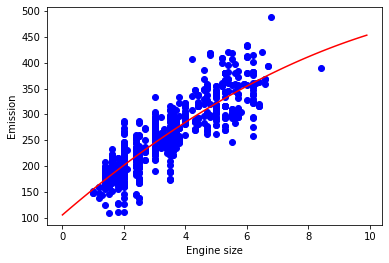

In [26]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')

XX = np.arange(0.0, 10.0, 0.1)

yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)

plt.plot(XX, yy, '-r' )

plt.xlabel("Engine size")
plt.ylabel("Emission")

In [31]:
clf.intercept_[0],clf.coef_[0][2],clf.coef_[0][1]

(105.24026431481681, -1.6429824339821497, 51.421581718895)

In [32]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )

Mean absolute error: 22.57
Residual sum of squares (MSE): 867.76
R2-score: 0.79


# Polinminal regression with degree = 3 

Coefficients:  [[ 0.         30.39624555  4.28653995 -0.50450758]]
Intercept:  [127.15404954]
Mean absolute error: 22.43
Residual sum of squares (MSE): 863.78
R2-score: 0.79


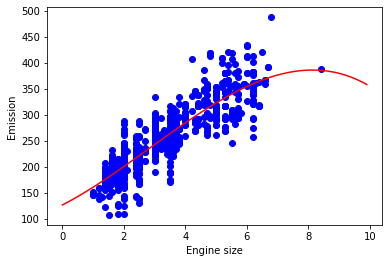

In [33]:
poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x)
clf3 = linear_model.LinearRegression()
train_y3_ = clf3.fit(train_x_poly3, train_y)

# The coefficients
print ('Coefficients: ', clf3.coef_)
print ('Intercept: ',clf3.intercept_)
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf3.intercept_[0]+ clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX, 2) + clf3.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
test_x_poly3 = poly3.fit_transform(test_x)
test_y3_ = clf3.predict(test_x_poly3)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y3_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y3_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y3_ ) )

# 4:

Coefficients:  [[ 0.00000000e+00  4.02093357e+01  2.40417267e-01  1.69825150e-01
  -3.89780694e-02]]
Intercept:  [119.16843873]
Mean absolute error: 22.43
Residual sum of squares (MSE): 862.95
R2-score: 0.79


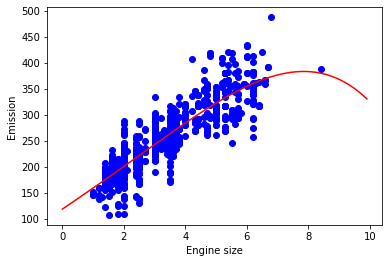

In [39]:
poly4 = PolynomialFeatures(degree=4)
train_x_poly4 = poly4.fit_transform(train_x)
clf4 = linear_model.LinearRegression()
train_y4_ = clf4.fit(train_x_poly4, train_y)

# The coefficients
print ('Coefficients: ', clf4.coef_)
print ('Intercept: ',clf4.intercept_)
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf4.intercept_[0]+ clf4.coef_[0][1]*XX + clf4.coef_[0][2]*np.power(XX, 2) + clf4.coef_[0][3]*np.power(XX, 3) + clf4.coef_[0][4]*np.power(XX, 4)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
test_x_poly4 = poly4.fit_transform(test_x)
test_y4_ = clf4.predict(test_x_poly4)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y4_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y4_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y4_ ) )

# 5

Coefficients:  [[ 0.00000000e+00  1.98270290e+02 -9.03789679e+01  2.39872935e+01
  -2.93035403e+00  1.30657612e-01]]
Intercept:  [18.62272228]
Mean absolute error: 22.57
Residual sum of squares (MSE): 867.96
R2-score: 0.79


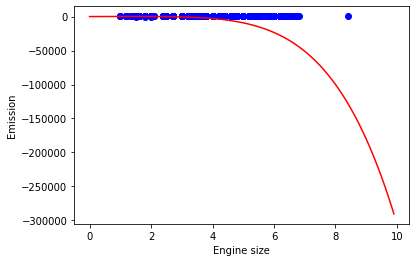

In [41]:
poly5 = PolynomialFeatures(degree=5)
train_x_poly5 = poly5.fit_transform(train_x)
clf5 = linear_model.LinearRegression()
train_y5_ = clf5.fit(train_x_poly5, train_y)

# The coefficients
print ('Coefficients: ', clf5.coef_)
print ('Intercept: ',clf5.intercept_)
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf5.intercept_[0]+ clf5.coef_[0][1]*XX + clf5.coef_[0][2]*np.power(XX, 2) + clf5.coef_[0][3]*np.power(XX, 3) + clf5.coef_[0][4]*np.power(XX, 4) + clf5.coef_[0][4]*np.power(XX, 5)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
test_x_poly5 = poly5.fit_transform(test_x)
test_y5_ = clf5.predict(test_x_poly5)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y5_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y5_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y5_ ) )